In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler




In [48]:
data = pd.read_csv("train.csv")

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [53]:
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [54]:

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(data[col].value_counts())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


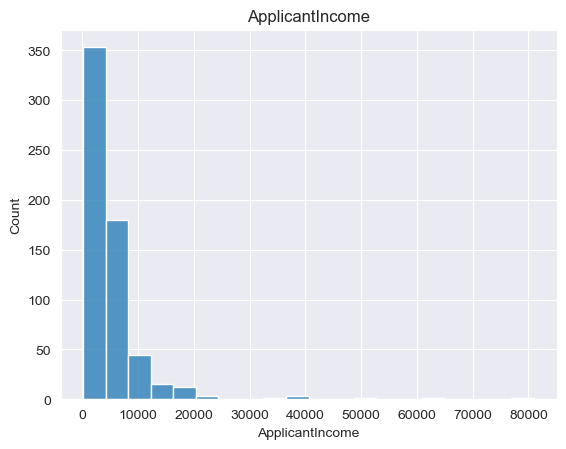

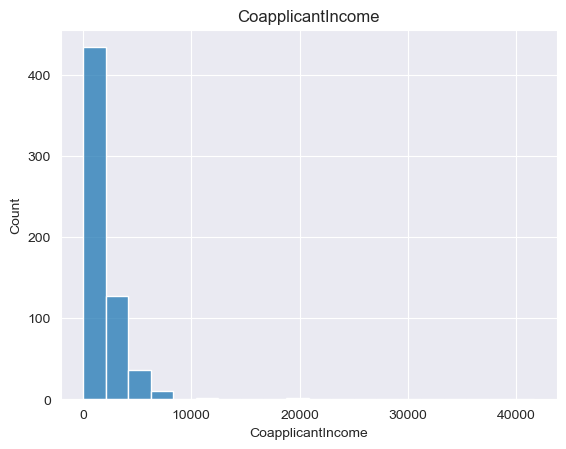

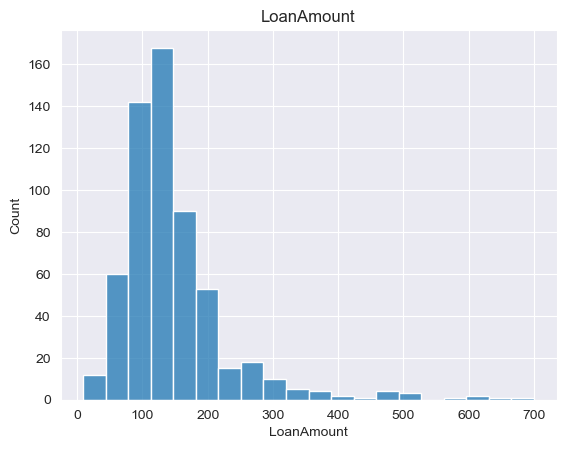

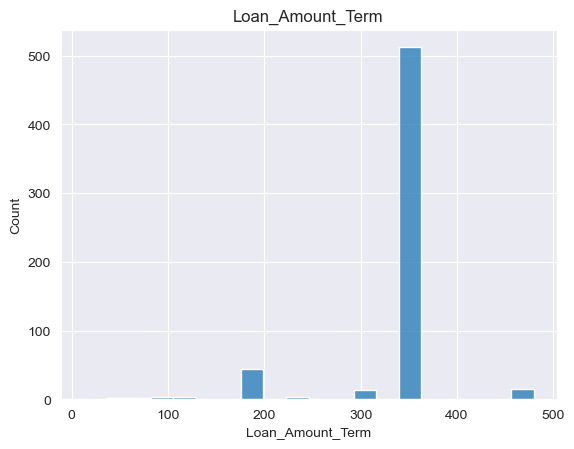

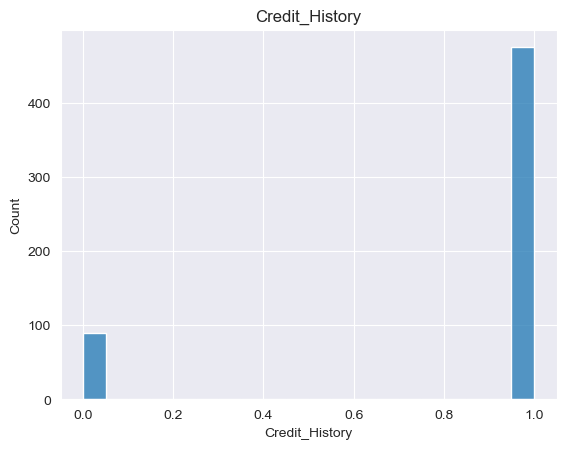

In [55]:
num_cols = data.select_dtypes(exclude=['object']).columns
for col in num_cols:
    sns.histplot(data[col], bins=20)
    plt.title(col)
    plt.show()


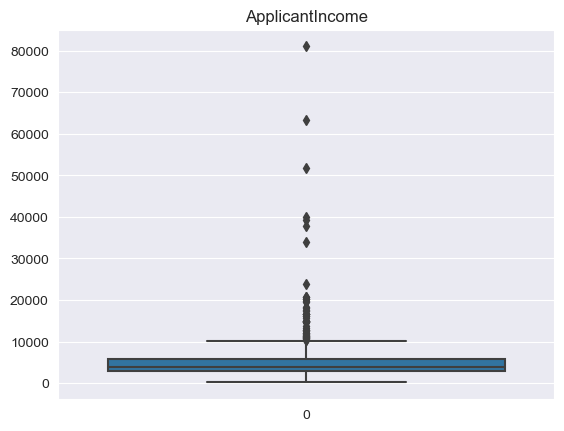

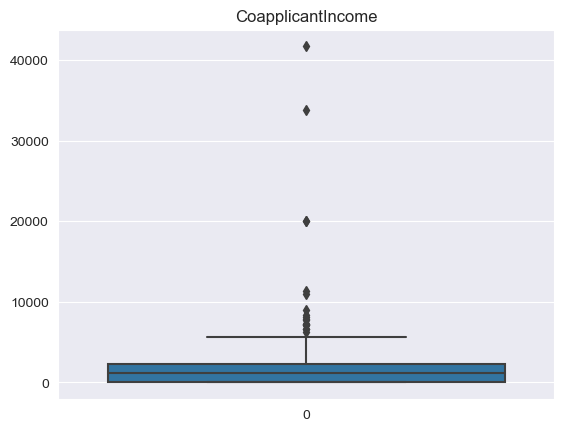

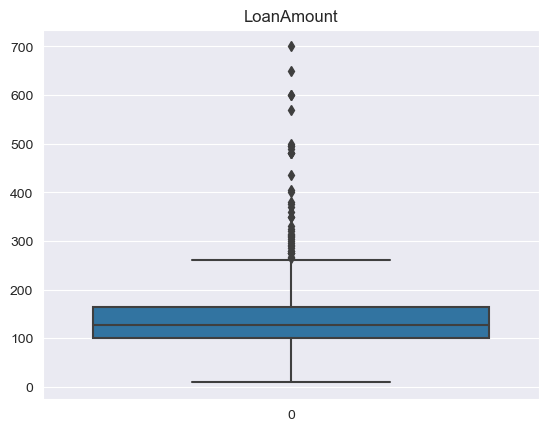

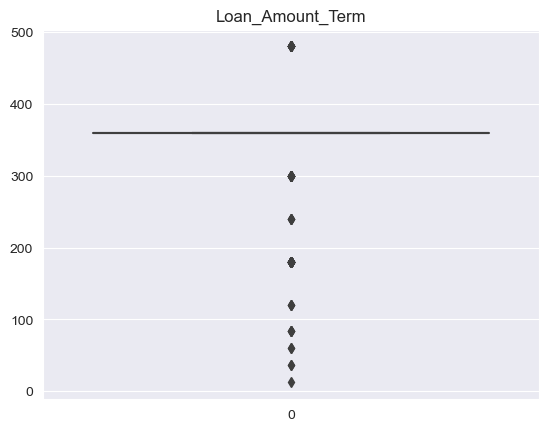

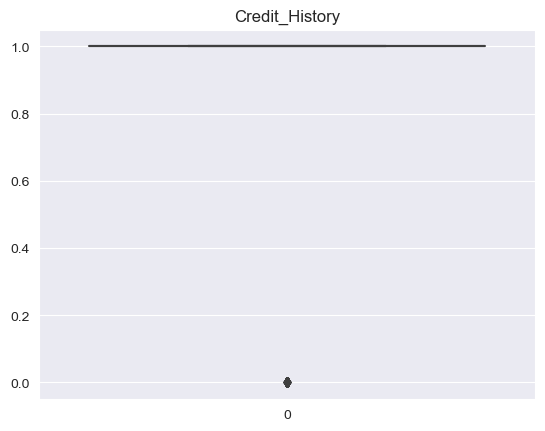

In [83]:
#give me boxplot of everything
for col in num_cols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [84]:
#balance outliers
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 25000, 25000, data['ApplicantIncome'])
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] > 10000, 10000, data['CoapplicantIncome'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 400, 400, data['LoanAmount'])


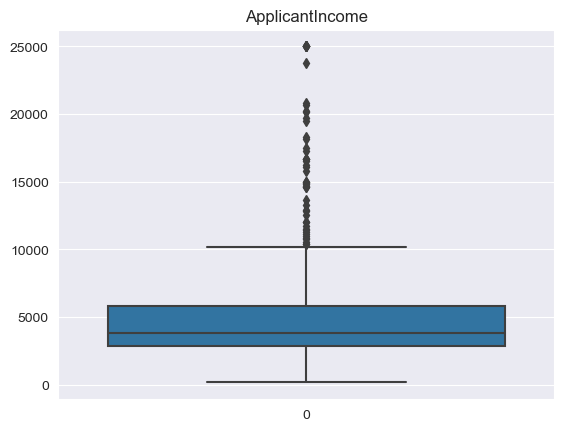

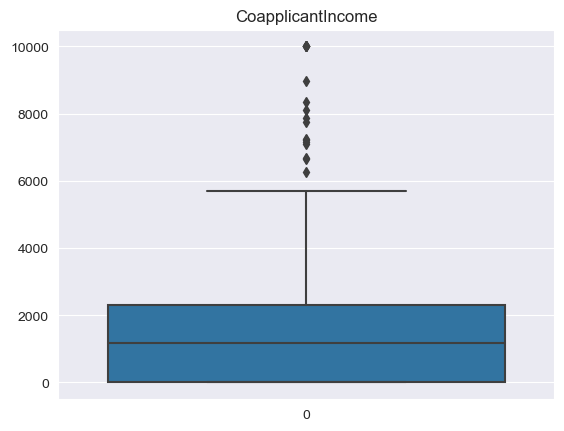

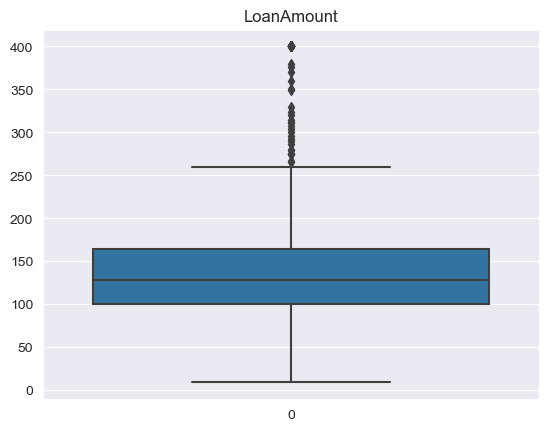

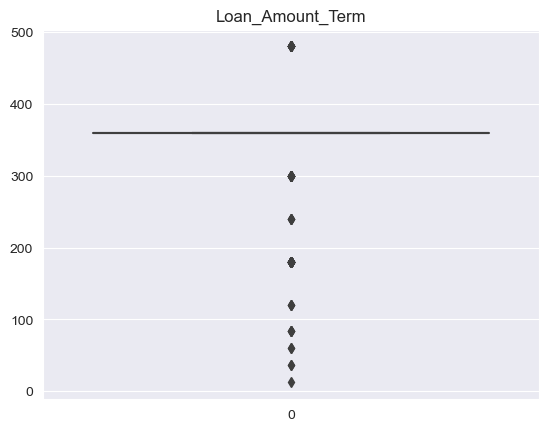

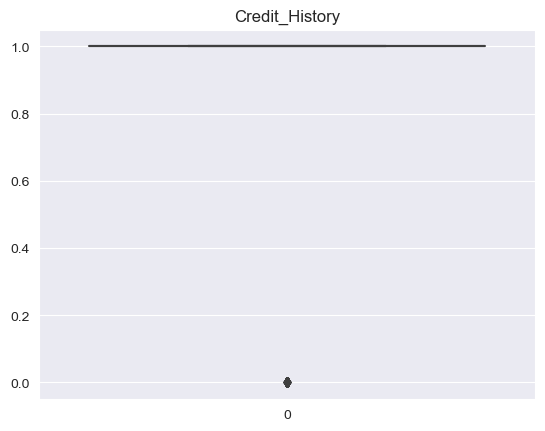

In [86]:
#check the boxplot again
for col in num_cols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [92]:
#still remove outlliers from everything
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 10000, 10000, data['ApplicantIncome'])
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] > 7000, 7000, data['CoapplicantIncome'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 250, 250, data['LoanAmount'])


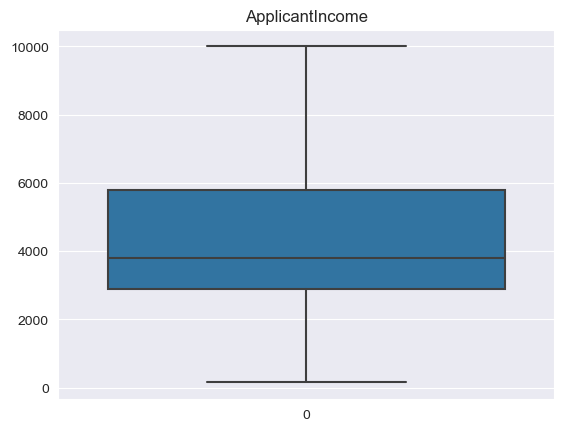

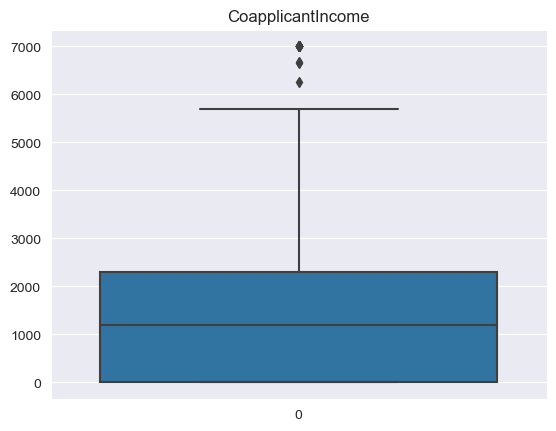

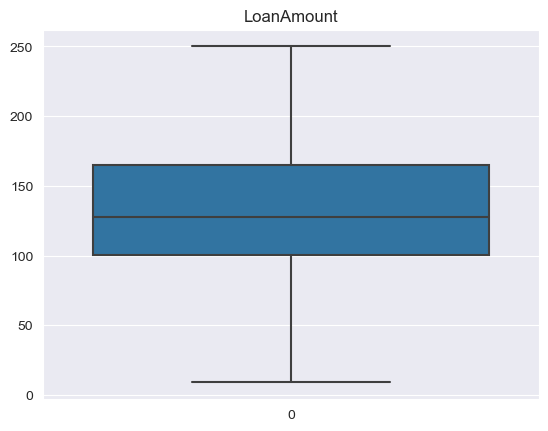

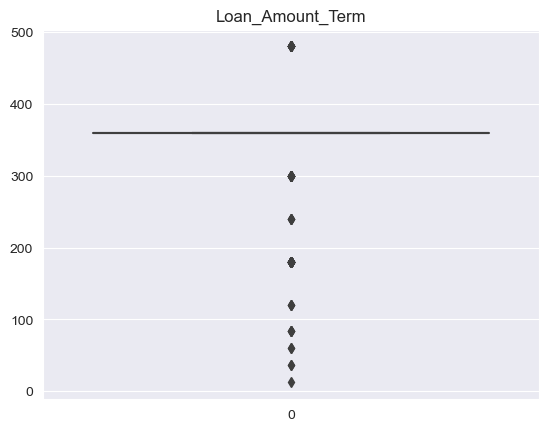

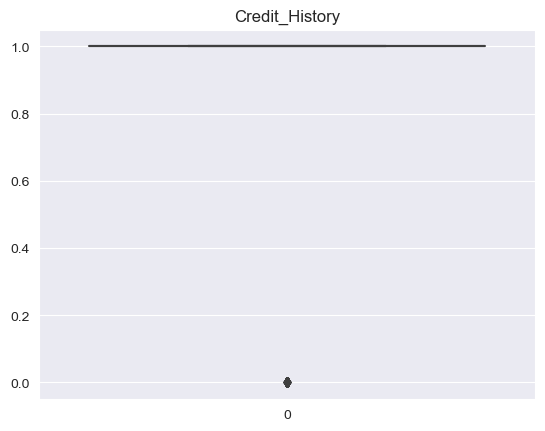

In [93]:
#check the boxplot again
for col in num_cols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [95]:

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data['Dependents'].fillna('0', inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)


In [98]:
data = pd.get_dummies(data, columns=['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

In [99]:
data.drop(['Loan_ID'], axis=1, inplace=True)

KeyError: "['Loan_ID'] not found in axis"

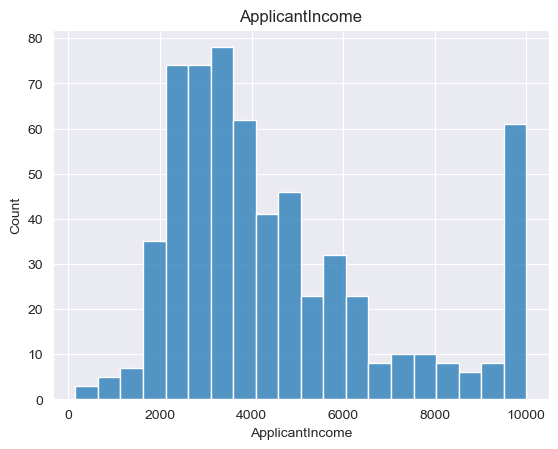

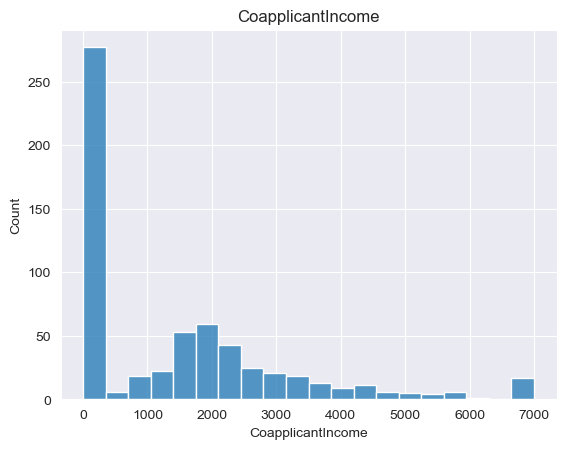

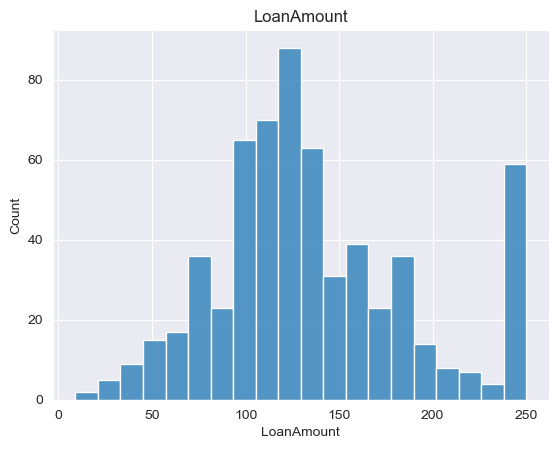

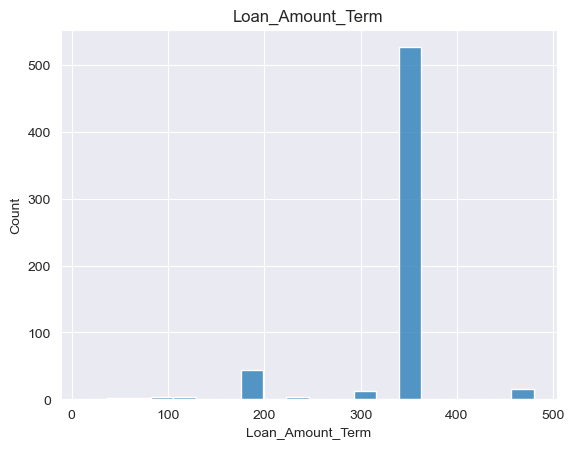

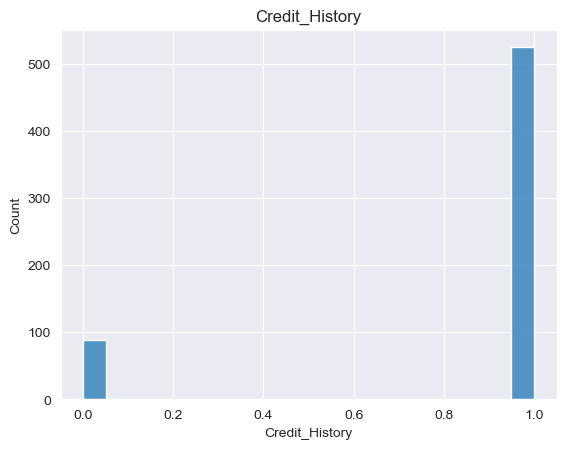

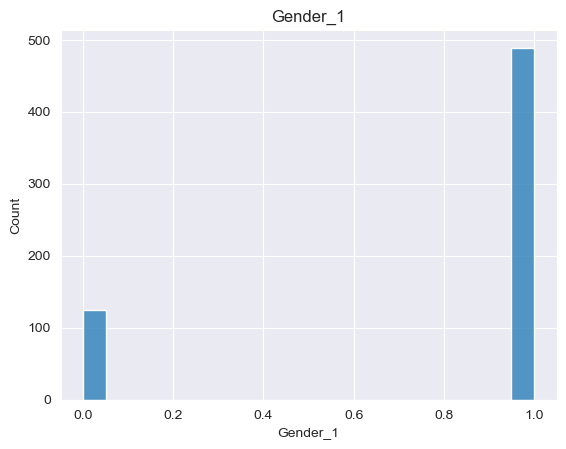

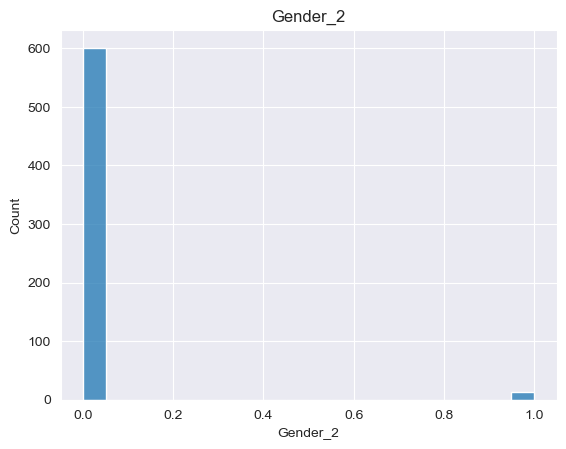

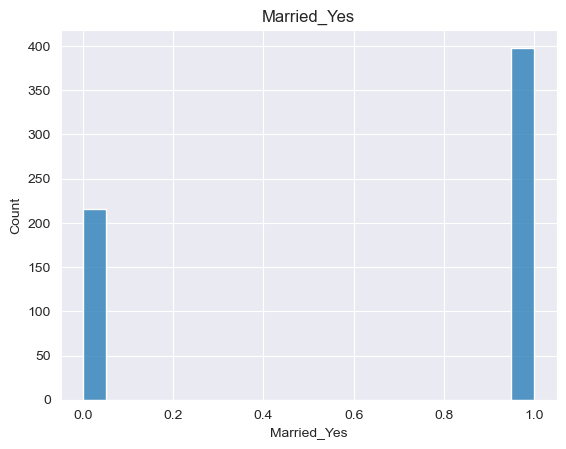

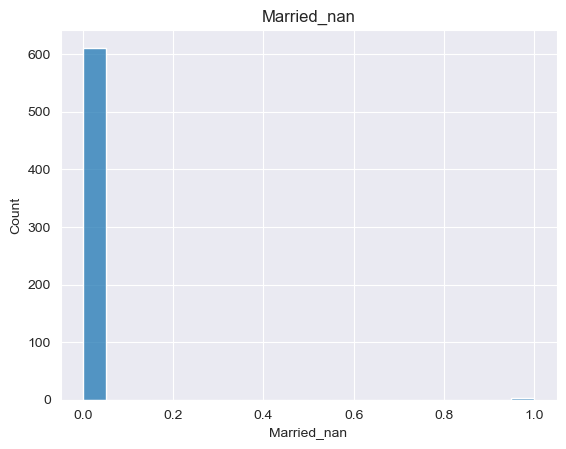

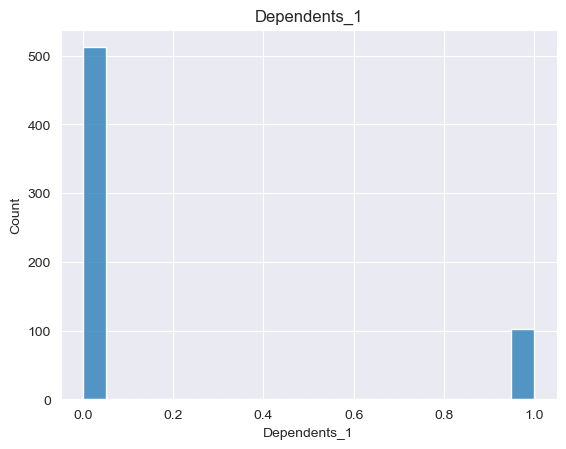

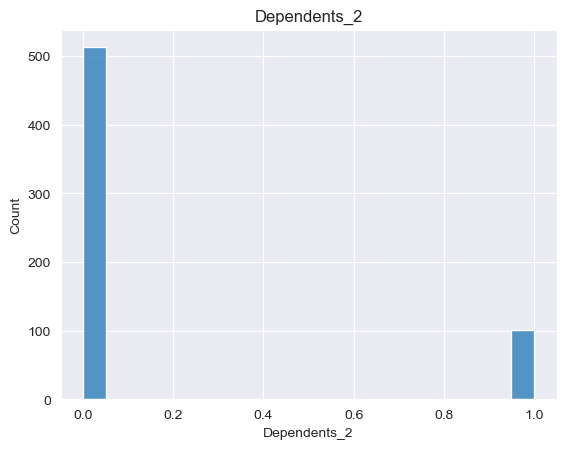

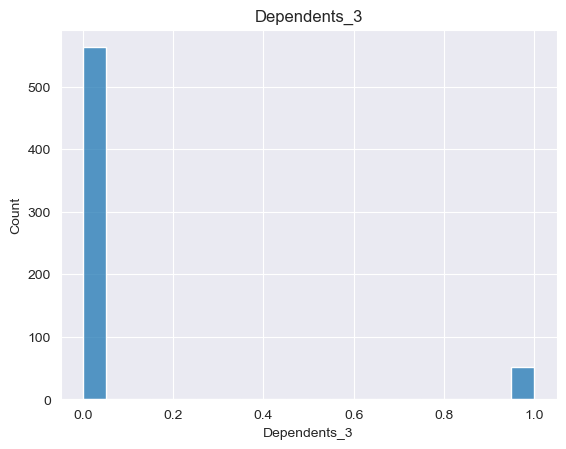

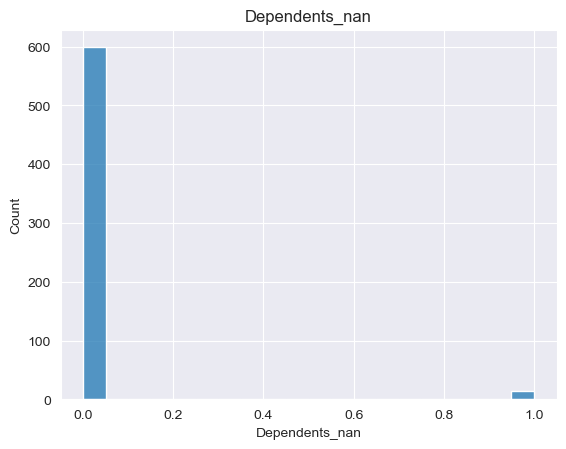

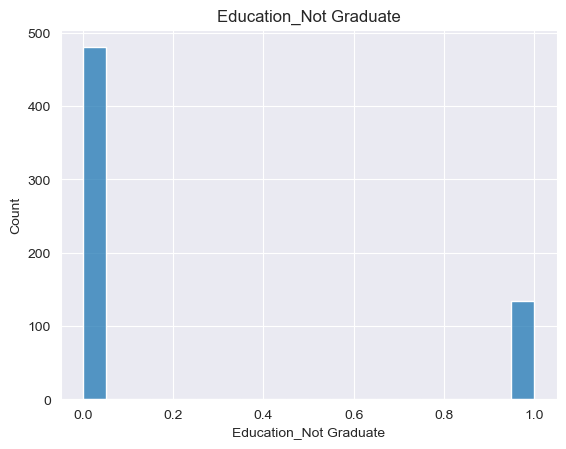

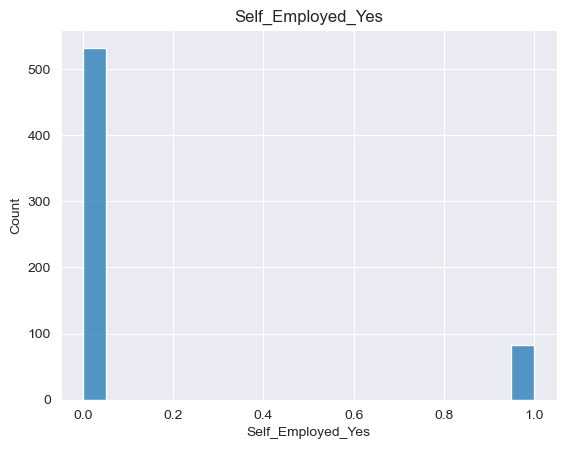

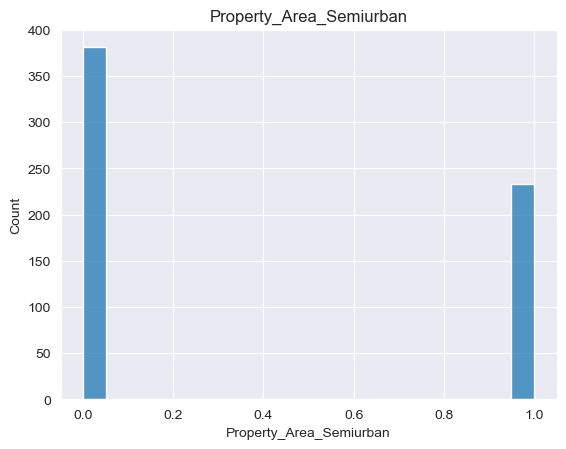

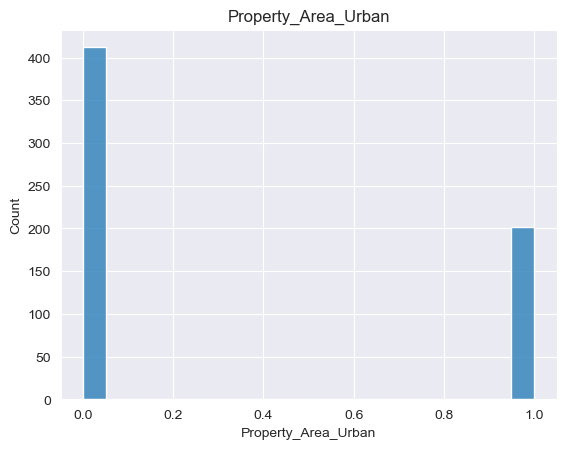

In [108]:
num_cols = data.select_dtypes(exclude=['object']).columns
for col in num_cols:
    sns.histplot(data[col], bins=20)
    plt.title(col)
    plt.show()

In [109]:
# balance everything use smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data.drop(['Loan_Status'], axis=1), data['Loan_Status'])


In [111]:
#continue with the model
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [112]:
#scale the data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [113]:
#train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


In [114]:
#check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7159763313609467
Classification Report:
               precision    recall  f1-score   support

           N       0.77      0.69      0.73        94
           Y       0.66      0.75      0.70        75

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.72      0.72      0.72       169

Confusion Matrix:
 [[65 29]
 [19 56]]


In [115]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(estimator=dt_model, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [116]:
#grid searchCV is trained do the next steps now
print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7}
0.7807407407407407


In [118]:
#model decision tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [119]:
#now check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7810650887573964
Classification Report:
               precision    recall  f1-score   support

           N       0.85      0.73      0.79        94
           Y       0.72      0.84      0.77        75

    accuracy                           0.78       169
   macro avg       0.78      0.79      0.78       169
weighted avg       0.79      0.78      0.78       169

Confusion Matrix:
 [[69 25]
 [12 63]]


In [120]:
#increase acuracy further
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [121]:
#check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8224852071005917
Classification Report:
               precision    recall  f1-score   support

           N       0.90      0.77      0.83        94
           Y       0.75      0.89      0.82        75

    accuracy                           0.82       169
   macro avg       0.83      0.83      0.82       169
weighted avg       0.83      0.82      0.82       169


KeyError: "None of [Index(['Gender', 'Other_categorical_columns'], dtype='object')] are in the [columns]"

ValueError: could not convert string to float: 'Male'